In [ ]:
#IMPORT ALL LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import re
import joblib


In [104]:
df.info()  # type: ignore


<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         7777 non-null   object 
 1   type            7777 non-null   object 
 2   title           7777 non-null   object 
 3   director        7777 non-null   object 
 4   cast            7777 non-null   object 
 5   country         7777 non-null   object 
 6   date_added      7777 non-null   object 
 7   release_year    7777 non-null   int64  
 8   rating          7777 non-null   object 
 9   duration        7777 non-null   object 
 10  listed_in       7777 non-null   object 
 11  description     7777 non-null   object 
 12  genre_list      7777 non-null   object 
 13  duration_int    7777 non-null   int64  
 14  content_age     7777 non-null   int64  
 15  genre_count     7777 non-null   int64  
 16  type_encoded    7777 non-null   int64  
 17  rating_encoded  7777 non-null   int64 

In [ ]:
df.describe(include="all") # type: ignore


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,rating_encoded,HC_Cluster,DBSCAN_Cluster,KMeans_cluster,HC_cluster,DBSCAN_cluster,PCA1,PCA2,TSNE1,TSNE2
count,7777,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,...,7777.000000,7777.000000,7777.0,7777.000000,7777.000000,7777.000000,7.777000e+03,7.777000e+03,7777.000000,7777.000000
unique,7777,2,7777,4050,6822,682,1565,NaN,14,216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,s1,Movie,3%,Unknown,Not Available,United States,"January 1, 2020",NaN,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,5377,1,2379,718,2549,118,NaN,2868,1608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,...,7.044104,0.132185,-1.0,0.141828,0.132185,-0.980841,-4.385502e-17,-1.461834e-16,-0.516170,0.003218
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,...,1.942389,0.573564,0.0,0.417370,0.573564,0.240601,2.168360e+00,1.982592e+00,35.741108,32.092152
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,...,0.000000,0.000000,-1.0,0.000000,0.000000,-1.000000,-3.290361e+00,-3.605200e+00,-84.410110,-75.739677
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,...,6.000000,0.000000,-1.0,0.000000,0.000000,-1.000000,-1.706711e+00,-1.142435e+00,-24.658085,-22.697811
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,...,8.000000,0.000000,-1.0,0.000000,0.000000,-1.000000,-9.994952e-01,-4.455198e-01,0.440469,0.023966
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,...,8.000000,0.000000,-1.0,0.000000,0.000000,-1.000000,2.114669e+00,5.801353e-01,25.780426,22.677402


In [106]:
df.isnull().sum() # type: ignore


show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
genre_list        0
duration_int      0
content_age       0
genre_count       0
type_encoded      0
rating_encoded    0
HC_Cluster        0
DBSCAN_Cluster    0
KMeans_cluster    0
HC_cluster        0
DBSCAN_cluster    0
PCA1              0
PCA2              0
TSNE1             0
TSNE2             0
dtype: int64

In [107]:
# 1. Fill director with "Unknown"
df['director'] = df['director'].fillna("Unknown") # type: ignore

# 2. Fill cast with "Not Available"
df['cast'] = df['cast'].fillna("Not Available") # type: ignore

# 3. Fill country with "Unknown"
df['country'] = df['country'].fillna("Unknown")

# 4. Drop rows where date_added is missing (only 10 rows)
df = df.dropna(subset=['date_added'])

# 5. Fill rating with the most frequent rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [108]:
df.isnull().sum()


show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
genre_list        0
duration_int      0
content_age       0
genre_count       0
type_encoded      0
rating_encoded    0
HC_Cluster        0
DBSCAN_Cluster    0
KMeans_cluster    0
HC_cluster        0
DBSCAN_cluster    0
PCA1              0
PCA2              0
TSNE1             0
TSNE2             0
dtype: int64

In [ ]:
df = df.drop_duplicates()


<Axes: xlabel='release_year'>

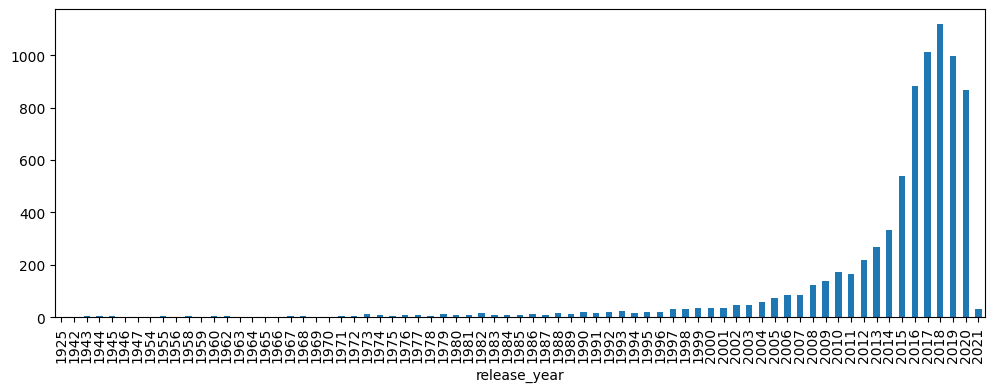

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,4))


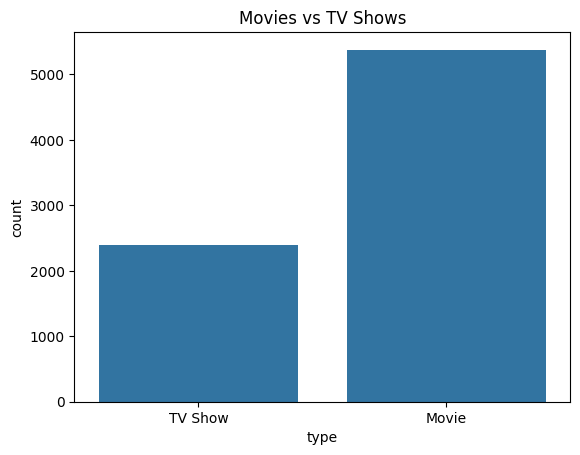

In [ ]:
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")
plt.show()


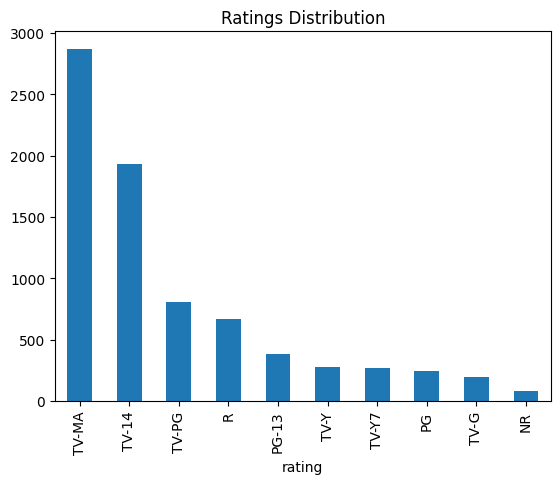

In [ ]:
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Ratings Distribution")
plt.show()


In [ ]:
categorical_cols = ['type', 'rating']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)


In [ ]:
df['genre_list'] = df['listed_in'].str.split(', ')

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['genre_list']), 
                             columns=mlb.classes_)


In [ ]:
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rsbs0\AppData\Local\Temp\ipykernel_22308\479287164.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_scaled = scaler.fit_transform(df[['release_year', 'duration_int']])
numeric_scaled = pd.DataFrame(numeric_scaled, columns=['release_year_scaled','duration_scaled'])


In [ ]:
X = pd.concat([numeric_scaled, df_encoded, genre_encoded], axis=1)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# ---- 1. Clean the text columns ----
df['description'] = df['description'].astype(str)
df['listed_in'] = df['listed_in'].astype(str)

# ---- 2. TF-IDF for description (limit to 200 features to avoid overfitting) ----
tfidf_desc = TfidfVectorizer(stop_words='english', max_features=200)
desc_features = tfidf_desc.fit_transform(df['description'])
desc_df = pd.DataFrame(desc_features.toarray(),
                       columns=[f"desc_{w}" for w in tfidf_desc.get_feature_names_out()])

# ---- 3. TF-IDF for listed_in (genres) ----
tfidf_genre = TfidfVectorizer(stop_words='english', max_features=50)
genre_features = tfidf_genre.fit_transform(df['listed_in'])
genre_df = pd.DataFrame(genre_features.toarray(),
                        columns=[f"genre_{w}" for w in tfidf_genre.get_feature_names_out()])

# ---- 4. Combine TF-IDF outputs ----
tfidf_final = pd.concat([desc_df, genre_df], axis=1)

# Show shape of final TF-IDF matrix
tfidf_final.shape


(7777, 244)

In [ ]:
#Feature Engineering
import datetime

# ---- 1. Create Content Age ----
current_year = datetime.datetime.now().year
df['content_age'] = current_year - df['release_year']

# ---- 2. Genre Count ----
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(', ')))

# ---- 3. Encode key categorical columns (basic label encoding) ----
from sklearn.preprocessing import LabelEncoder

le_type = LabelEncoder()
le_rating = LabelEncoder()

df['type_encoded'] = le_type.fit_transform(df['type'])
df['rating_encoded'] = le_rating.fit_transform(df['rating'])

# Show the new engineered features
df[['release_year', 'content_age', 'genre_count', 'type_encoded', 'rating_encoded']].head()


,release_year,content_age,genre_count,type_encoded,rating_encoded
0,2020,5,3,1,8
1,2016,9,2,0,8
2,2011,14,2,0,5
3,2009,16,3,0,4
4,2008,17,1,0,4


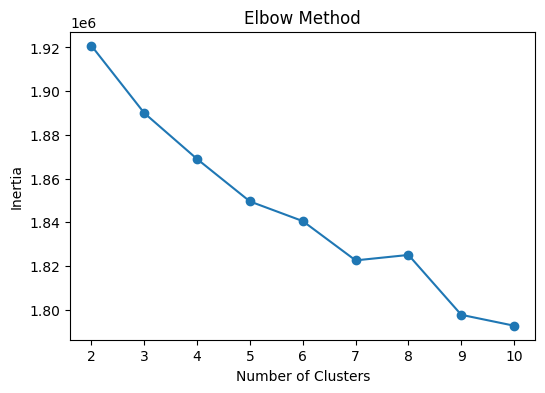

Clusters: 2, Silhouette Score: 0.008777704225432382
Clusters: 3, Silhouette Score: 0.03274015764112375
Clusters: 4, Silhouette Score: 0.027183680124967725
Clusters: 5, Silhouette Score: 0.01713277935037167
Clusters: 6, Silhouette Score: 0.018422708076871956
Clusters: 7, Silhouette Score: 0.022924436927533206
Clusters: 8, Silhouette Score: 0.02023869949989242
Clusters: 9, Silhouette Score: 0.02301248023190703
Clusters: 10, Silhouette Score: 0.0236101263705714

Best number of clusters based on Silhouette Score: 3


In [ ]:
#Clustering Model Selection:
# Select structured features
numeric_features = df[['content_age', 'genre_count', 'type_encoded', 'rating_encoded']]

# Combine numeric + TF-IDF features
X = pd.concat([numeric_features.reset_index(drop=True),
               tfidf_final.reset_index(drop=True)], axis=1)

# ------------------------------
# 2. Scale the features
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 3. Elbow Method to find optimal clusters
# ------------------------------
inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# ------------------------------
# 4. Silhouette Score for each k
# ------------------------------
sil_scores = {}

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"Clusters: {k}, Silhouette Score: {sil}")

# Best K
best_k = max(sil_scores, key=sil_scores.get)
print("\nBest number of clusters based on Silhouette Score:", best_k)

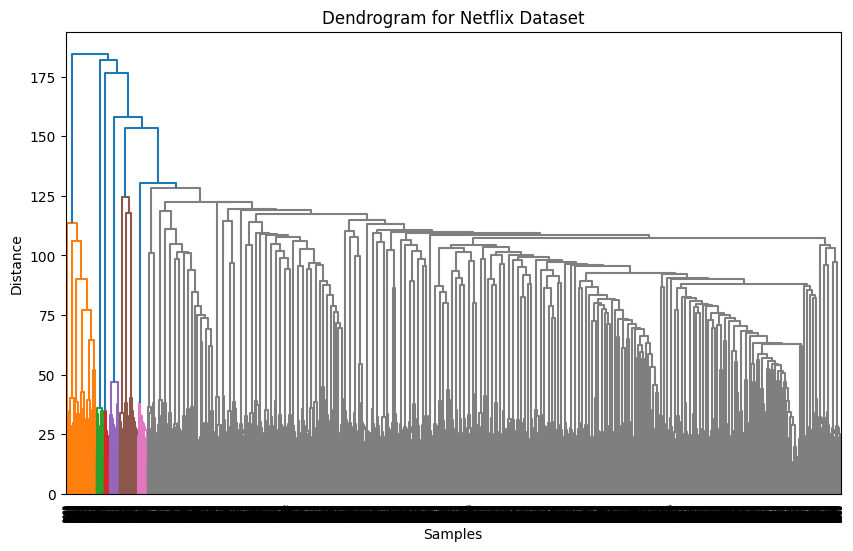

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram for Netflix Dataset")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
df['HC_Cluster'] = hc_labels


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=10)
db_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = db_labels

# DBSCAN will label noise as -1
print(df['DBSCAN_Cluster'].value_counts())

# Silhouette score only if more than 1 cluster (excluding noise)
if len(set(db_labels)) > 1:
    print("Silhouette Score:", silhouette_score(X_scaled, db_labels))
else:
    print("Not enough clusters for silhouette score")


DBSCAN_Cluster
-1    7777
Name: count, dtype: int64
Not enough clusters for silhouette score


In [ ]:
dbscan = DBSCAN(eps=3, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

print(pd.Series(labels).value_counts())


-1    7716
 0      19
 3      18
 1      14
 2      10
Name: count, dtype: int64


In [ ]:
#Train Clustering Models
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=best_k, random_state=42)
df['KMeans_cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['HC_cluster'] = hc.fit_predict(X_scaled)


In [84]:
for link in ['complete', 'average', 'single']:
    hc = AgglomerativeClustering(n_clusters=5, linkage=link)
    labels = hc.fit_predict(X_scaled)
    print(link, silhouette_score(X_scaled, labels))


complete 0.05308951384036661
average 0.11294294559739146
single 0.11106675534675903


In [85]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=10)
df['DBSCAN_cluster'] = db.fit_predict(X_scaled)


In [86]:
scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, labels)
    scores.append((k, s))
    print(k, s)

best_k = max(scores, key=lambda x: x[1])[0]
best_k


2 0.008777704225432382
3 0.03274015764112375
4 0.027183680124967725
5 0.01713277935037167
6 0.018422708076871956
7 0.022924436927533206
8 0.02023869949989242
9 0.02301248023190703
10 0.0236101263705714


3

In [87]:
for eps in [0.5, 1, 2, 3, 5]:
    db = DBSCAN(eps=eps, min_samples=10)
    labels = db.fit_predict(X_scaled)
    unique = len(set(labels))
    print("eps =", eps, "| clusters =", unique, "| noise =", list(labels).count(-1))


eps = 0.5 | clusters = 1 | noise = 7777
eps = 1 | clusters = 3 | noise = 7749
eps = 2 | clusters = 4 | noise = 7736
eps = 3 | clusters = 5 | noise = 7716
eps = 5 | clusters = 6 | noise = 7626


In [88]:
for link in ['ward', 'complete', 'average']:
    hc = AgglomerativeClustering(n_clusters=best_k, linkage=link)
    labels = hc.fit_predict(X_scaled)
    print(link, silhouette_score(X_scaled, labels))


ward 0.023472051814175127
complete 0.09217335077480086
average 0.12044380418208636


In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]


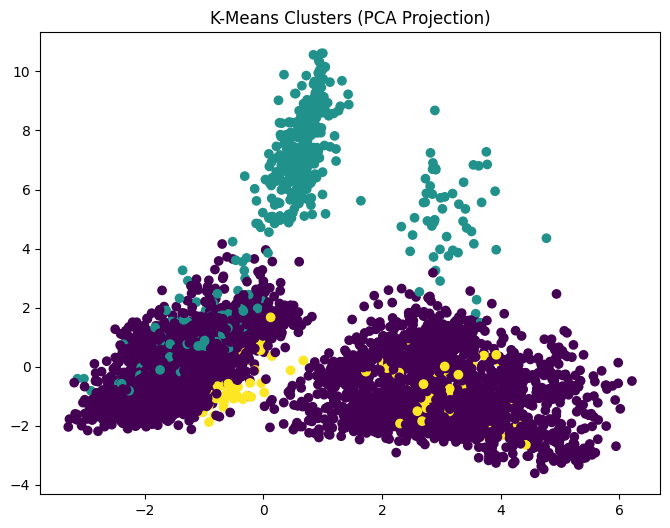

In [90]:
#Visualization & Interpretation
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['KMeans_cluster'])
plt.title("K-Means Clusters (PCA Projection)")
plt.show()


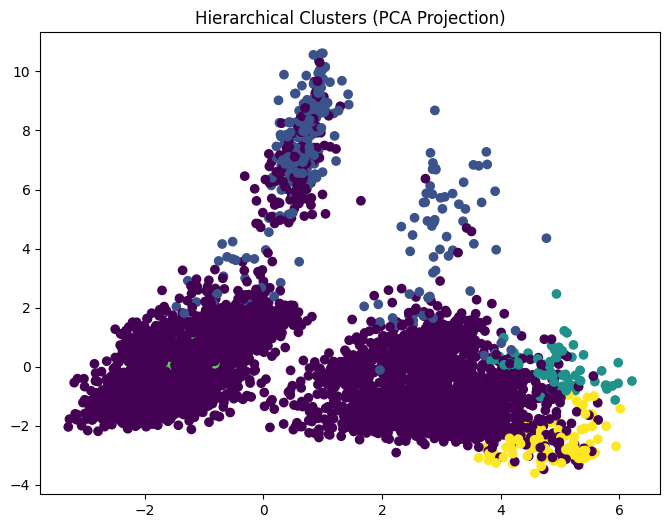

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['HC_cluster'])
plt.title("Hierarchical Clusters (PCA Projection)")
plt.show()


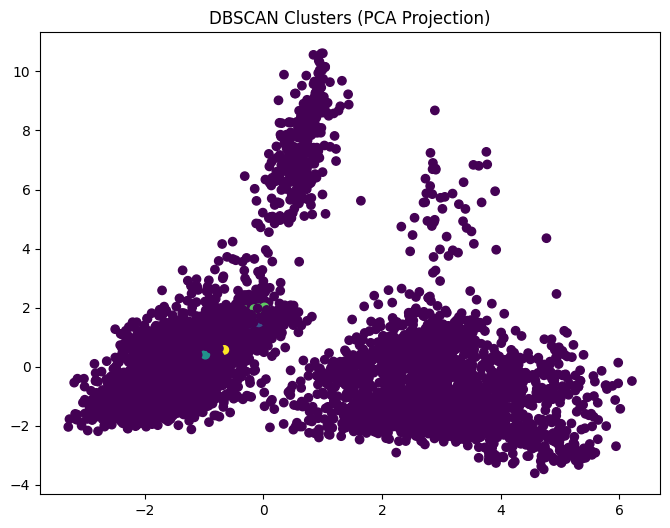

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['DBSCAN_cluster'])
plt.title("DBSCAN Clusters (PCA Projection)")
plt.show()


In [93]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

df["TSNE1"] = tsne_components[:, 0]
df["TSNE2"] = tsne_components[:, 1]


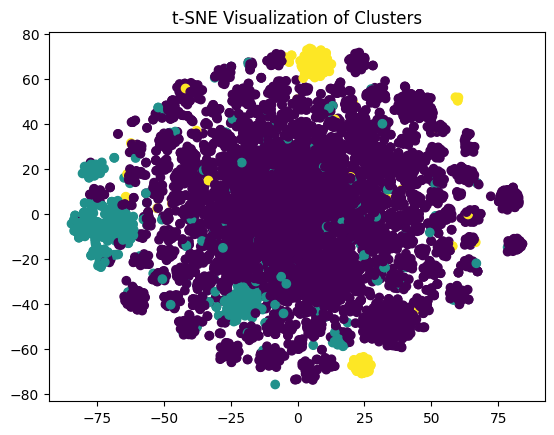

In [94]:
plt.scatter(df["TSNE1"], df["TSNE2"], c=df["KMeans_cluster"])
plt.title("t-SNE Visualization of Clusters")
plt.show()


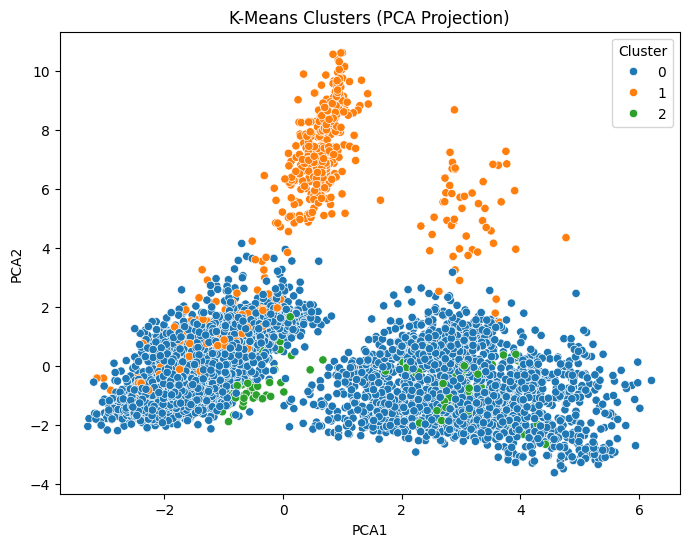

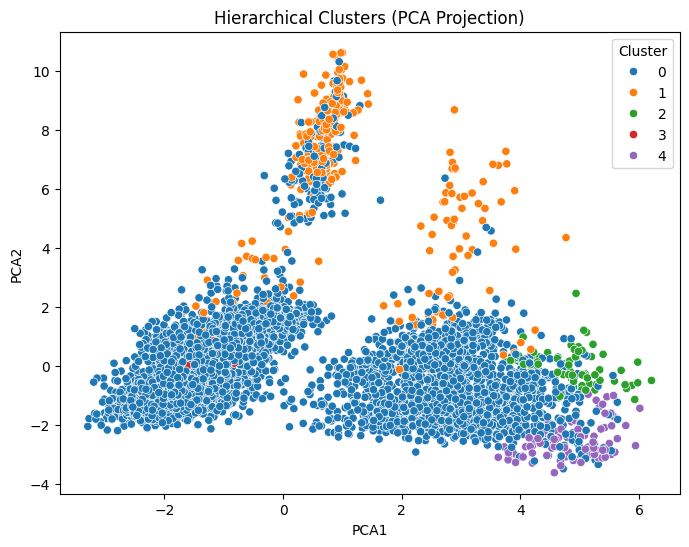

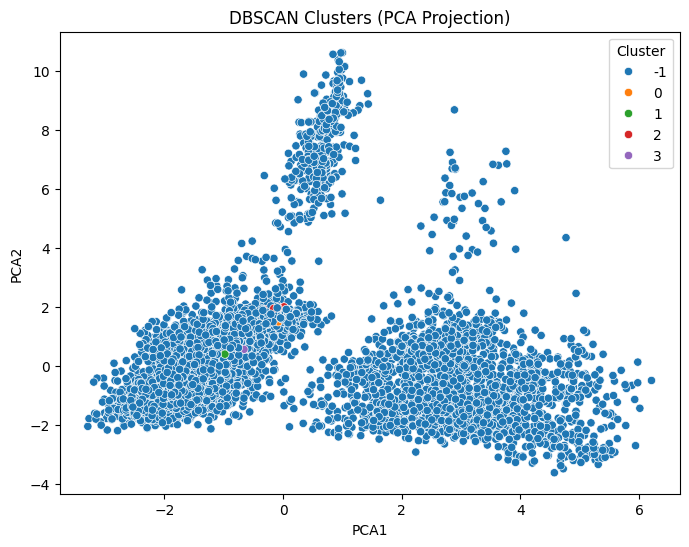

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot clusters
def plot_clusters(df, x, y, cluster_col, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x, y=y, hue=cluster_col, palette="tab10")
    plt.title(title)
    plt.legend(title='Cluster')
    plt.show()

# K-Means Clusters
plot_clusters(df, 'PCA1', 'PCA2', 'KMeans_cluster', "K-Means Clusters (PCA Projection)")

# Hierarchical Clusters
plot_clusters(df, 'PCA1', 'PCA2', 'HC_cluster', "Hierarchical Clusters (PCA Projection)")

# DBSCAN Clusters
plot_clusters(df, 'PCA1', 'PCA2', 'DBSCAN_cluster', "DBSCAN Clusters (PCA Projection)")


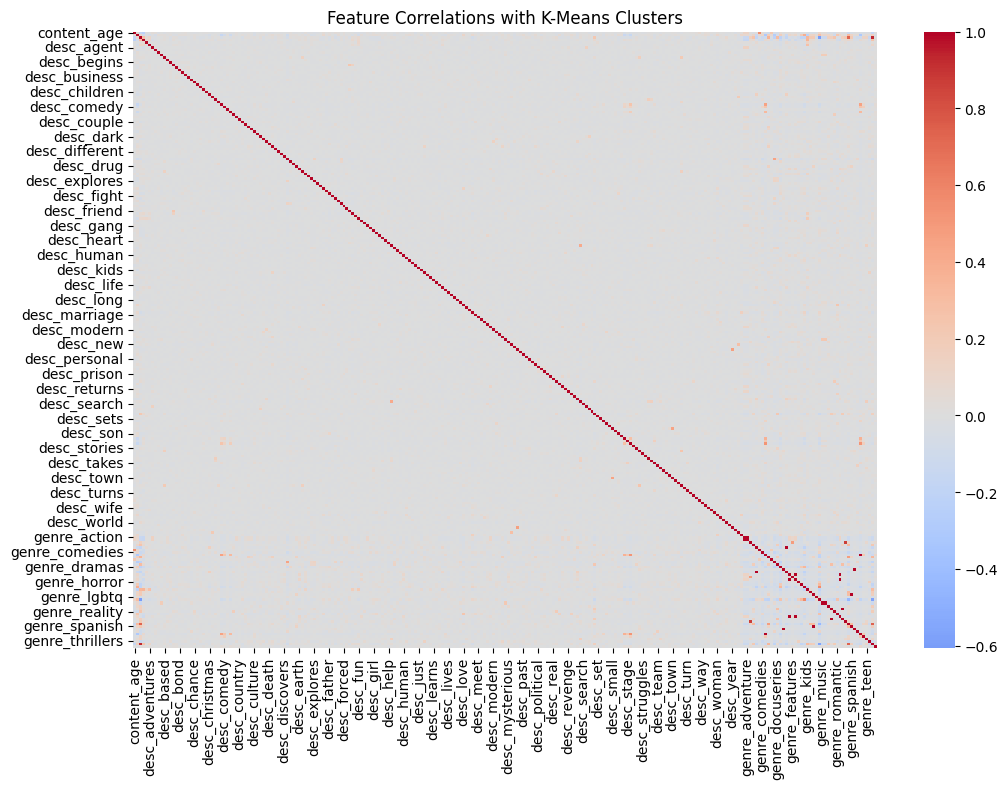

In [96]:
# Add cluster column to features for correlation
feature_corr = X.copy()  # numeric + TF-IDF features
feature_corr['KMeans_cluster'] = df['KMeans_cluster']

plt.figure(figsize=(12,8))
sns.heatmap(feature_corr.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlations with K-Means Clusters")
plt.show()


In [97]:
# Function to get top genres per cluster
def top_genres(cluster_num):
    cluster_data = df[df['KMeans_cluster'] == cluster_num]
    genre_list = cluster_data['listed_in'].str.split(', ').sum()  # flatten list
    genre_counts = pd.Series(genre_list).value_counts()
    return genre_counts.head(5)

# Example: Top genres per KMeans cluster
for c in sorted(df['KMeans_cluster'].unique()):
    print(f"\nCluster {c} top genres:")
    print(top_genres(c))



Cluster 0 top genres:
International Movies      2240
Dramas                    2031
Comedies                  1391
International TV Shows    1076
TV Dramas                  703
Name: count, dtype: int64

Cluster 1 top genres:
Stand-Up Comedy         329
Music & Musicals        318
International Movies    163
Documentaries           112
Comedies                 80
Name: count, dtype: int64

Cluster 2 top genres:
Anime Series              147
International TV Shows    106
Anime Features             57
Action & Adventure         38
International Movies       34
Name: count, dtype: int64


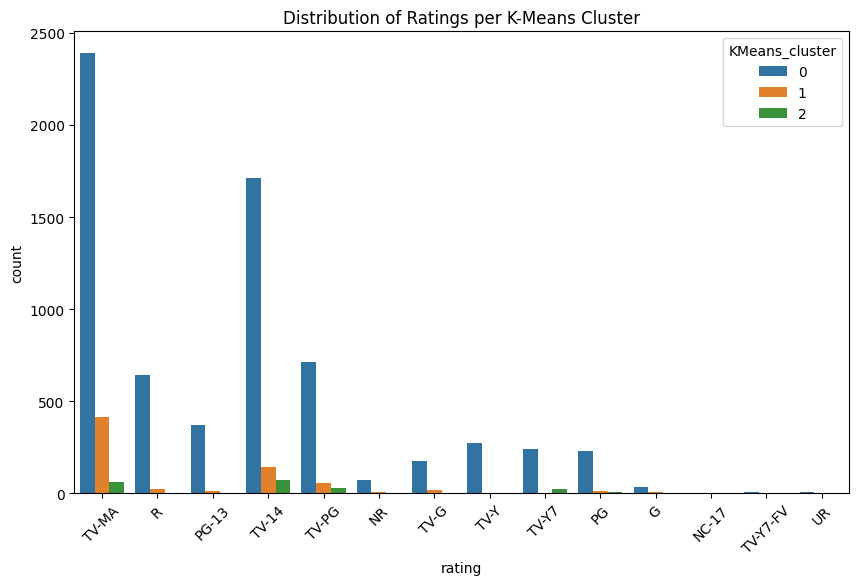

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', hue='KMeans_cluster', palette="tab10")
plt.title("Distribution of Ratings per K-Means Cluster")
plt.xticks(rotation=45)
plt.show()


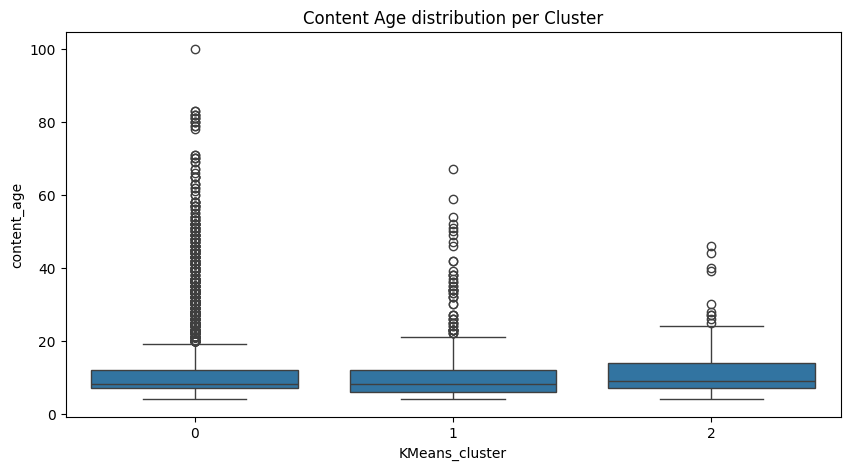

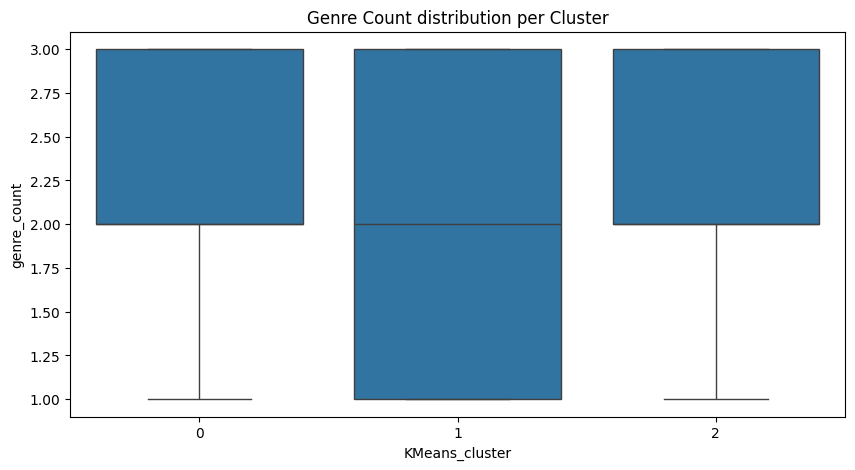

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x='KMeans_cluster', y='content_age', data=df)
plt.title("Content Age distribution per Cluster")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='KMeans_cluster', y='genre_count', data=df)
plt.title("Genre Count distribution per Cluster")
plt.show()


In [100]:
#Visualization & Interpretation
from sklearn.metrics import silhouette_score, davies_bouldin_score
# K-Means clusters
kmeans_labels = df['KMeans_cluster']

sil_score_km = silhouette_score(X_scaled, kmeans_labels)
db_score_km = davies_bouldin_score(X_scaled, kmeans_labels)
inertia_km = KMeans(n_clusters=best_k, random_state=42).fit(X_scaled).inertia_

print("K-Means Evaluation Metrics:")
print(f"Silhouette Score: {sil_score_km:.4f}")
print(f"Davies-Bouldin Index: {db_score_km:.4f}")
print(f"Inertia: {inertia_km:.2f}")


K-Means Evaluation Metrics:
Silhouette Score: 0.0327
Davies-Bouldin Index: 4.5864
Inertia: 1889984.37


In [101]:
hc_labels = df['HC_cluster']

sil_score_hc = silhouette_score(X_scaled, hc_labels)
db_score_hc = davies_bouldin_score(X_scaled, hc_labels)

print("\nHierarchical Clustering Evaluation Metrics:")
print(f"Silhouette Score: {sil_score_hc:.4f}")
print(f"Davies-Bouldin Index: {db_score_hc:.4f}")



Hierarchical Clustering Evaluation Metrics:
Silhouette Score: 0.0286
Davies-Bouldin Index: 2.8000


In [102]:
db_labels = df['DBSCAN_cluster']
unique_clusters = set(db_labels)

if len(unique_clusters) > 1 and -1 not in unique_clusters:
    sil_score_db = silhouette_score(X_scaled, db_labels)
    db_score_db = davies_bouldin_score(X_scaled, db_labels)
    print("\nDBSCAN Evaluation Metrics:")
    print(f"Silhouette Score: {sil_score_db:.4f}")
    print(f"Davies-Bouldin Index: {db_score_db:.4f}")
else:
    print("\nDBSCAN evaluation skipped: not enough meaningful clusters")



DBSCAN evaluation skipped: not enough meaningful clusters


In [103]:
# Safely define DBSCAN scores
if len(unique_clusters) > 1 and -1 not in unique_clusters:
    sil_score_db = silhouette_score(X_scaled, db_labels)
    db_score_db = davies_bouldin_score(X_scaled, db_labels)
else:
    sil_score_db = None
    db_score_db = None

# Create comparison DataFrame
comparison = pd.DataFrame({
    "Model": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [sil_score_km, sil_score_hc, sil_score_db],
    "Davies-Bouldin Index": [db_score_km, db_score_hc, db_score_db]
})

comparison


,Model,Silhouette Score,Davies-Bouldin Index
0,K-Means,0.032740,4.586410
1,Hierarchical,0.028567,2.799955
2,DBSCAN,NaN,NaN


In [ ]:
#new cleaned data with clusters:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,rating_encoded,HC_Cluster,DBSCAN_Cluster,KMeans_cluster,HC_cluster,DBSCAN_cluster,PCA1,PCA2,TSNE1,TSNE2
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,8,0,-1,0,0,-1,1.536731,-2.091934,15.983353,55.575050
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,8,0,-1,0,0,-1,-1.494387,-0.489801,21.036823,10.003517
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,5,0,-1,0,0,-1,-1.979448,-0.556205,20.383625,-41.885387
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,4,0,-1,0,0,-1,-1.721282,-1.563655,65.534828,-1.817203
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,4,0,-1,0,0,-1,-0.845515,-0.028097,24.401552,68.436584


In [111]:
df.to_csv("processed_netflix.csv", index=False)
